<a href="https://colab.research.google.com/github/NadyaPutriAmalia/PCVK_Ganjil_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM**

In [2]:
from google.colab import drive

#Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


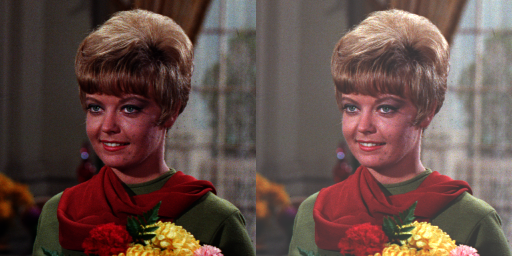

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

print(' Mengubah tingkat kecerahan citra')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]): #range (function) lebar
  for x in range(original.shape[1]): #panjang
    for c in range(original.shape[2]): #channel warna
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255) #batas range warna

#cara simpel tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


**TUGAS PRAKTIKUM**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori,

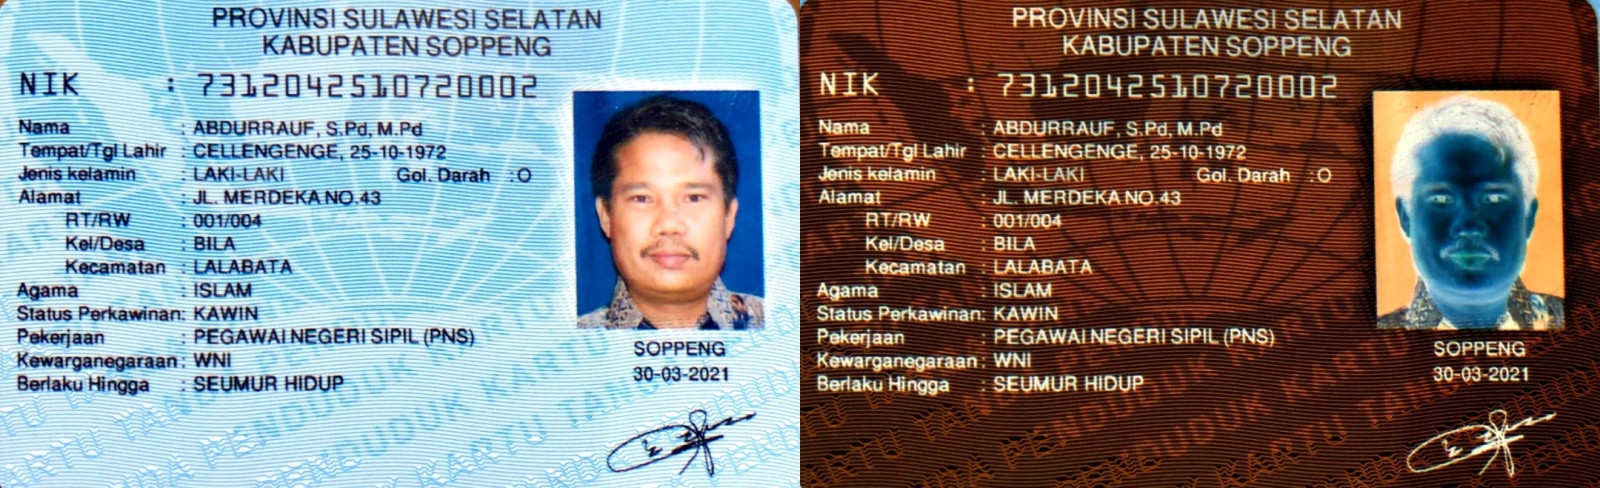

In [16]:
original = cv.imread('/content/KTP.jpeg')
negative_image = 255 - original

final_frame = cv.hconcat((original, negative_image))
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras

 Mengubah tingkat kontras dan kecerahan citra
-------------------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2


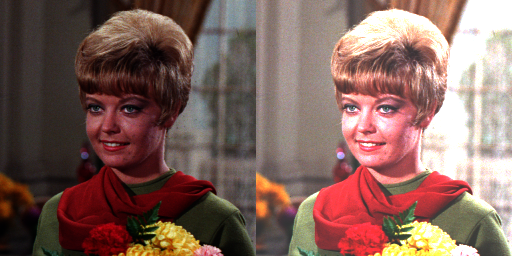

In [17]:
print(' Mengubah tingkat kontras dan kecerahan citra')
print('-------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan nilai kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a valid number')

original = cv.imread('/content/female.tiff')
modified_image = np.zeros(original.shape, original.dtype)

#mengubah kontras dan kecerahan per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      modified_image[y,x,c] = np.clip(contrast * original[y,x,c]+ brightness, 0, 255)
final_frame = cv.hconcat((original, modified_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log,

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukkan nilai kecerahan: 50


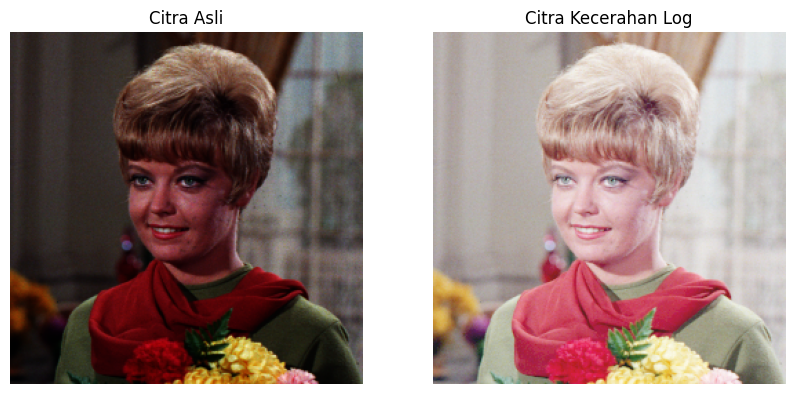

In [18]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')

# Tingkat Kecerahan
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

image_path = ('/content/female.tiff')
image = cv.imread(image_path)

# Menghitung transformasi kecerahan logaritmik
log_brightness_image = c * np.log(1 + image.astype(float))

# Normalisasi ke dalam rentang 0-255
log_brightness_image = (log_brightness_image / np.max(log_brightness_image) * 255).astype(np.uint8)

# Menampilkan citra asli dan citra dengan transformasi kecerahan logaritmik
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Citra Kecerahan Log')
plt.imshow(cv.cvtColor(log_brightness_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori

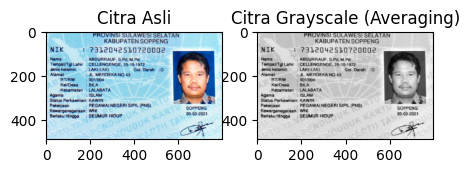

In [28]:
#a. Averaging
import matplotlib.pyplot as plt

# Baca citra
image_path = ('/content/KTP.jpeg')
image = cv.imread(image_path)

# Konversi citra ke grayscale menggunakan metode averaging
gray_image = np.mean(image, axis=2).astype(np.uint8)

# Menampilkan citra asli dan citra grayscale
plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(1, 2, 2)
plt.title('Citra Grayscale (Averaging)')
plt.imshow(gray_image, cmap='gray')
plt.axis('on')

plt.show()

a. Averaging


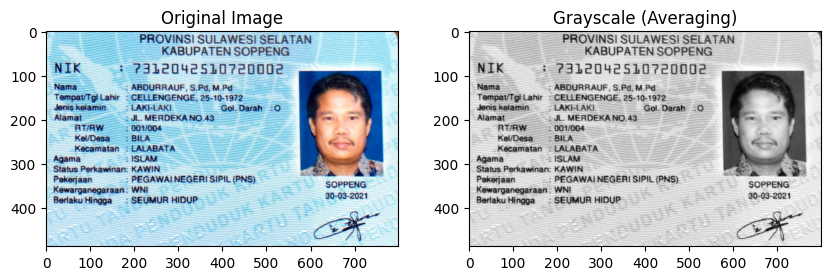

In [58]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Baca gambar sumber
base_image = cv2.imread('/content/KTP.jpeg')

# Implementasi Grayscale menggunakan metode Averaging
average_image = np.zeros(base_image.shape[:2], dtype=np.uint8)

for y in range(base_image.shape[0]):
    for x in range(base_image.shape[1]):
        red = int(base_image[y, x, 2])
        green = int(base_image[y, x, 1])
        blue = int(base_image[y, x, 0])
        avg = (red + green + blue) // 3
        average_image[y, x] = np.uint8(avg)

# Tampilkan gambar asli dan hasil transformasi grayscale
plt.figure(figsize=(10, 5))
print('a. Averaging')
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(average_image, cmap='gray')
plt.title('Grayscale (Averaging)')
plt.show()

Transformasi Grayscale - Metode Lightness
---------------------------------


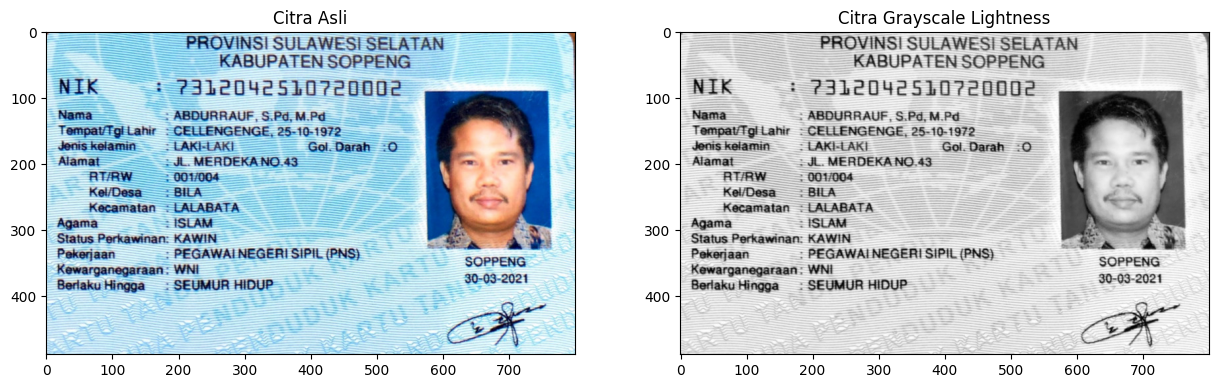

In [41]:
# B. Lightness
import matplotlib.pyplot as plt
import cv2
print('Transformasi Grayscale - Metode Lightness')
print('---------------------------------')

original = cv.imread('/content/KTP.jpeg')

grayscale_image = cv.cvtColor(original, cv.COLOR_BGR2Luv)[:, :, 0]

# Menampilkan citra asli dan citra grayscale
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.axis('on')  # Menghilangkan skala

plt.subplot(122)
plt.title('Citra Grayscale Lightness')
plt.imshow(grayscale_image, cmap='gray')
plt.axis('on')  # Menghilangkan skala
plt.show()

b. Lightness


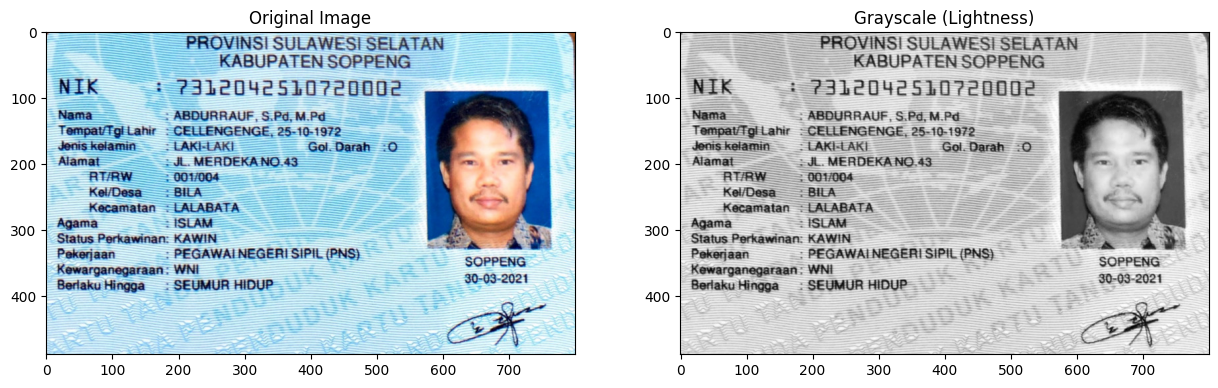

In [55]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Baca gambar sumber
base_image = cv2.imread('/content/KTP.jpeg')

# Implementasi Grayscale menggunakan metode Lightness
lightness_image = np.zeros(base_image.shape[:2], dtype=np.uint8)

for y in range(base_image.shape[0]):
    for x in range(base_image.shape[1]):
        red = int(base_image[y, x, 2])
        green = int(base_image[y, x, 1])
        blue = int(base_image[y, x, 0])
        lightness = (max(red, green, blue) + min(red, green, blue)) // 2
        lightness_image[y, x] = np.uint8(lightness)

plt.figure(figsize=(15, 5))

print('b. Lightness')
# Plot Lightness Transformation
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
im = plt.imshow(lightness_image, cmap='gray')
plt.title('Grayscale (Lightness)')

plt.show()

Transformasi Grayscale - Metode Luminance
----------------------------------------


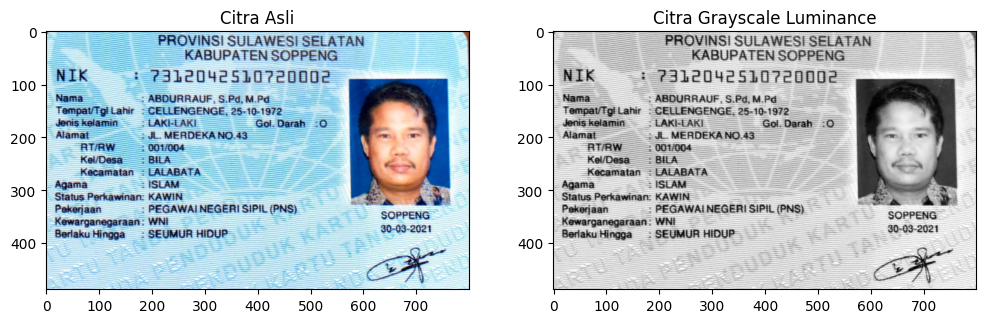

In [49]:
import cv2
import numpy as np

#C. LUMINANCE
print('Transformasi Grayscale - Metode Luminance')
print('----------------------------------------')

# Buat citra grayscale
gray_image = np.zeros(input_image.shape[:2], dtype=np.uint8)

for y in range(input_image.shape[0]):
    for x in range(input_image.shape[1]):
        # Ambil komponen warna RGB dari setiap piksel
        blue = input_image[y, x, 0]
        green = input_image[y, x, 1]
        red = input_image[y, x, 2]

        # Hitung nilai grayscale dengan rumus "luminance"
        grayscale_value = int(0.299 * red + 0.587 * green + 0.114 * blue)

        # Tetapkan nilai grayscale ke piksel yang sesuai
        gray_image[y, x] = grayscale_value

# Simpan citra grayscale
cv2.imwrite('grayscale_luminance_image.jpg', gray_image)
# Menampilkan citra asli dan citra grayscale dengan metode Luminance
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(input_image, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(122)
plt.title('Citra Grayscale Luminance')
plt.imshow(gray_image, cmap='gray')
plt.axis('on')
plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale

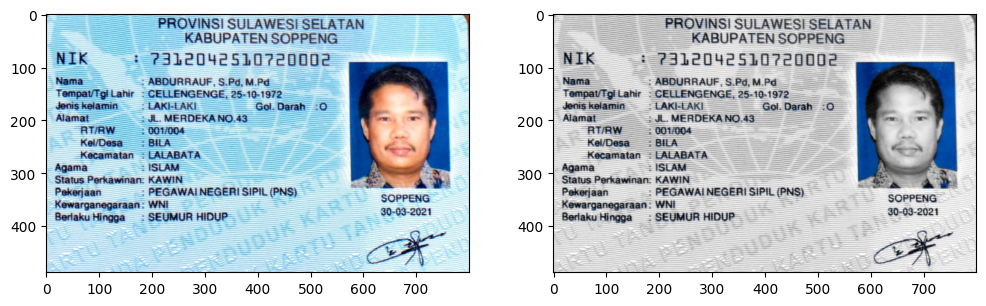

In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/KTP.jpeg')
final_result = np.zeros_like(image)

# Tentukan rentang warna biru (sesuaikan jika perlu)
lower_blue = np.array([100, 0, 0])    # Batas bawah rentang warna biru (format BGR)
upper_blue = np.array([255, 100, 100])  # Batas atas rentang warna biru (format BGR)

# Dapatkan dimensi gambar
tinggi, lebar, kanal = image.shape

# Konversi gambar ke citra grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



# Perulangan untuk mengiterasi melalui semua piksel gambar
for y in range(tinggi):
    for x in range(lebar):
        # Dapatkan nilai warna BGR piksel saat ini
        piksel = image[y, x]

        # Periksa apakah piksel saat ini berada dalam batas warna biru
        if (piksel >= lower_blue).all() and (piksel <= upper_blue).all():
            final_result[y, x] = image[y, x]  # Biarkan piksel biru tetap seperti aslinya
        else:
            final_result[y, x] = [gray[y, x], gray[y, x], gray[y, x]]  # Ubah bagian non-biru menjadi grayscale

# Tampilkan citra asli dan hasilnya menggunakan Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(final_result, cv2.COLOR_BGR2RGB))


plt.show()